In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Downloads/Case_Study_Marketing_Analyst.xlsx'
data_df = pd.read_excel(file_path, sheet_name='Data')

data_df['conversion_country'] = data_df['conversion_country'].replace('#NV', pd.NA)
data_df = data_df.dropna(subset=['conversion_country'])

C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


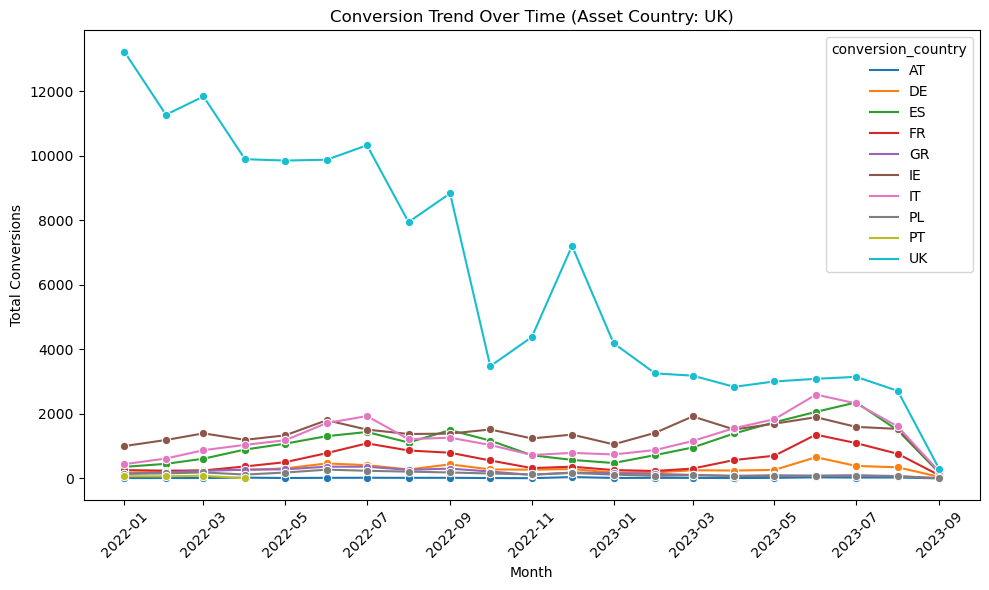

In [33]:
uk_data = data_df[data_df['asset_country'] == 'UK']

uk_conversions = uk_data.groupby(['month', 'conversion_country'])['Conversions'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Conversions', hue='conversion_country', data=uk_conversions, marker="o")
plt.title('Conversion Trend Over Time (Asset Country: UK)')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\3306232710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['conversion_group'] = uk_data['conversion_country'].apply(lambda x: 'UK' if x == 'UK' else 'Non_UK')
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_co

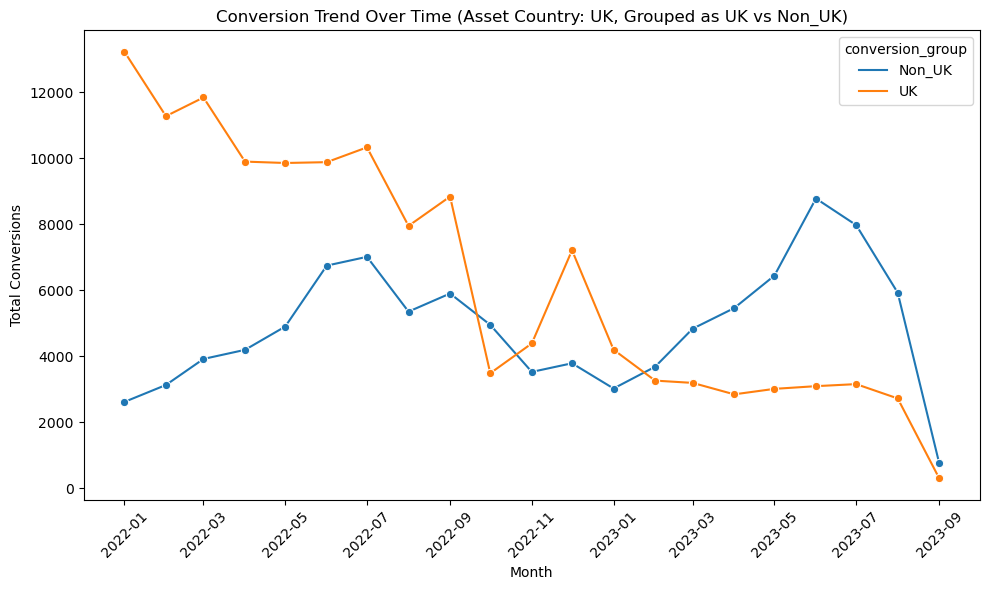

In [34]:

uk_data['conversion_group'] = uk_data['conversion_country'].apply(lambda x: 'UK' if x == 'UK' else 'Non_UK')

uk_conversions_grouped = uk_data.groupby(['month', 'conversion_group'])['Conversions'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='Conversions', hue='conversion_group', data=uk_conversions_grouped, marker="o")
plt.title('Conversion Trend Over Time (Asset Country: UK, Grouped as UK vs Non_UK)')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


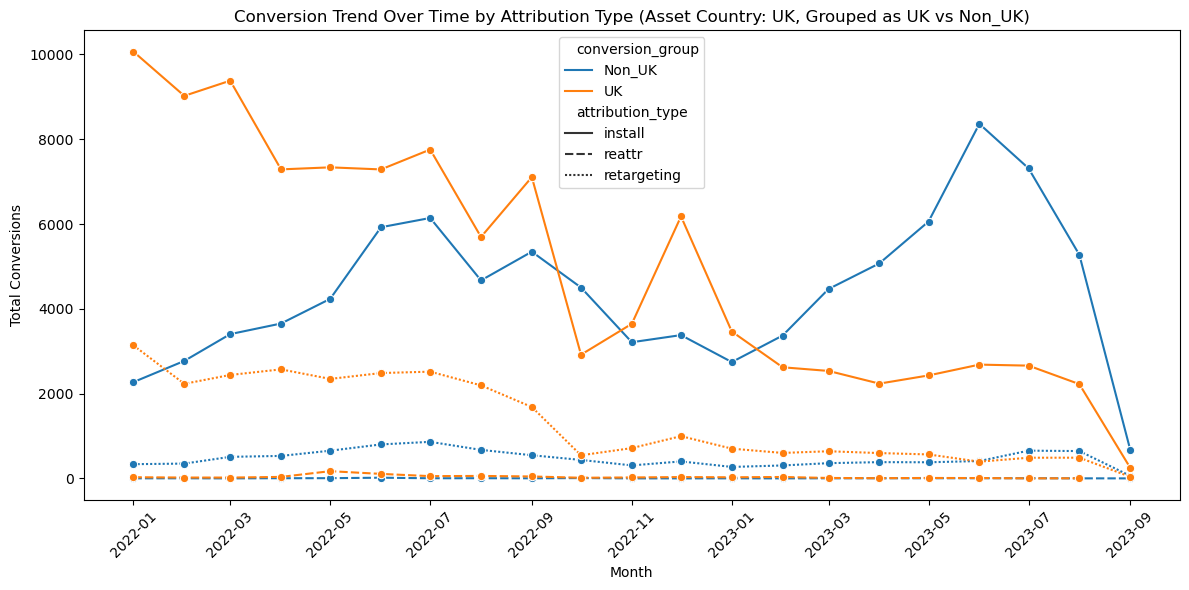

In [35]:
 
uk_conversions_grouped = uk_data.groupby(['month', 'conversion_group', 'attribution_type'])['Conversions'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Conversions', hue='conversion_group', style='attribution_type', data=uk_conversions_grouped, marker="o")
plt.title('Conversion Trend Over Time by Attribution Type (Asset Country: UK, Grouped as UK vs Non_UK)')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


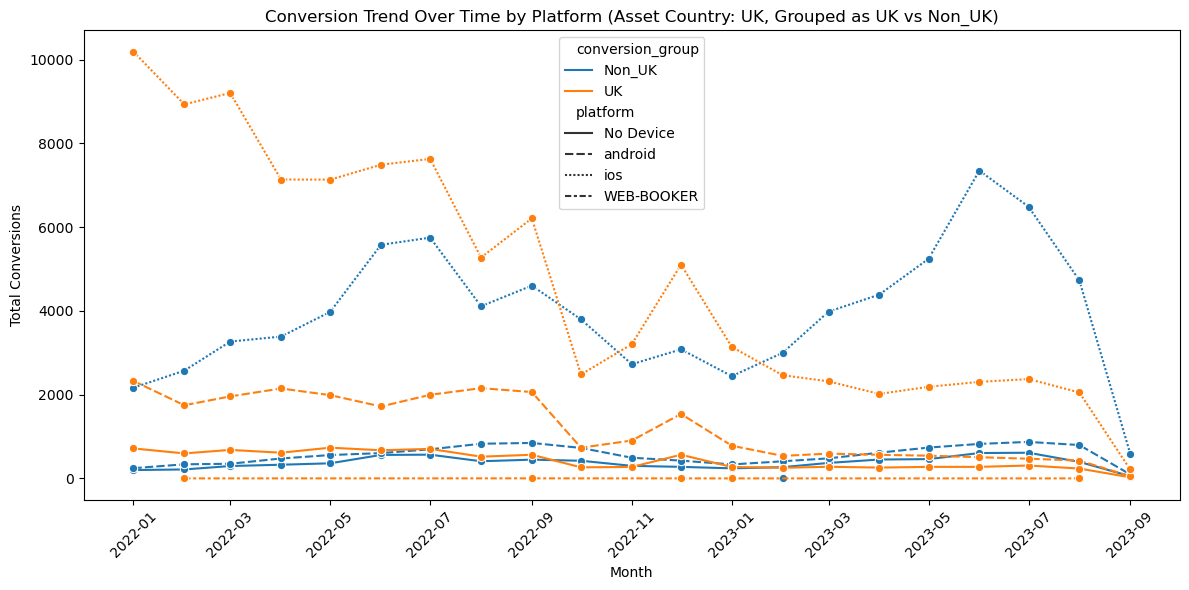

In [36]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Conversions', hue='conversion_group', style='platform', data=uk_conversions_platform_grouped, marker="o")
plt.title('Conversion Trend Over Time by Platform (Asset Country: UK, Grouped as UK vs Non_UK)')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\1718510257.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_data['duration_category'] = uk_data['duration_install_to_activation'].apply(categorize_duration)


<Figure size 1000x600 with 0 Axes>

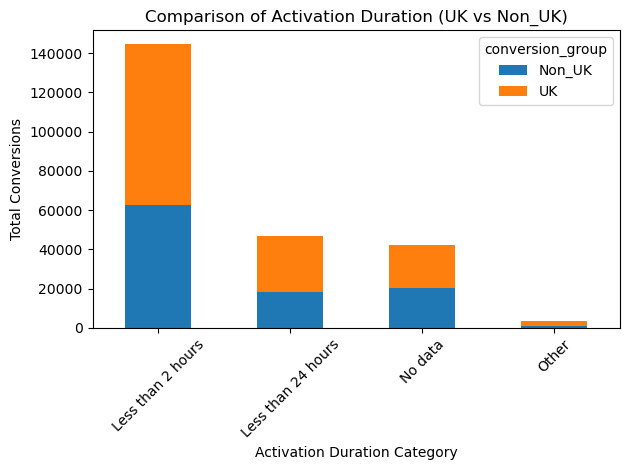

In [37]:
import numpy as np

def categorize_duration(value):
    if value == '<2h':
        return 'Less than 2 hours'
    elif value == '<24h':
        return 'Less than 24 hours'
    elif value == 'no data':
        return 'No data'
    else:
        return 'Other'

uk_data['duration_category'] = uk_data['duration_install_to_activation'].apply(categorize_duration)

uk_duration_grouped = uk_data.groupby(['conversion_group', 'duration_category'])['Conversions'].sum().reset_index()

uk_duration_pivot = uk_duration_grouped.pivot(index='duration_category', columns='conversion_group', values='Conversions').fillna(0)

plt.figure(figsize=(10, 6))
uk_duration_pivot.plot(kind='bar', stacked=True)
plt.title('Comparison of Activation Duration (UK vs Non_UK)')
plt.xlabel('Activation Duration Category')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

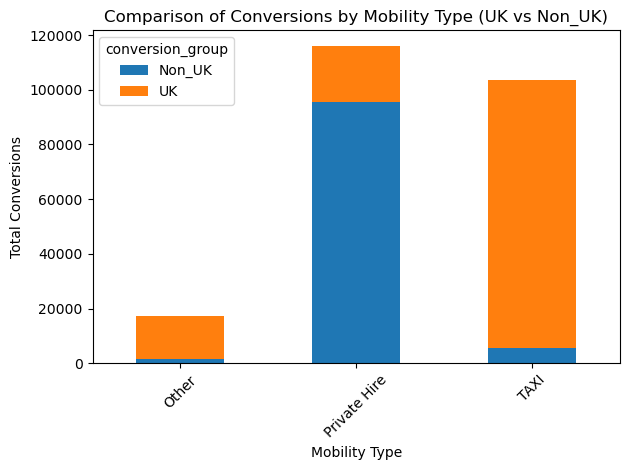

In [38]:
uk_mobility_grouped = uk_data.groupby(['conversion_group', 'mobility_type'])['Conversions'].sum().reset_index()

uk_mobility_pivot = uk_mobility_grouped.pivot(index='mobility_type', columns='conversion_group', values='Conversions').fillna(0)

plt.figure(figsize=(10, 6))
uk_mobility_pivot.plot(kind='bar', stacked=True)
plt.title('Comparison of Conversions by Mobility Type (UK vs Non_UK)')
plt.xlabel('Mobility Type')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


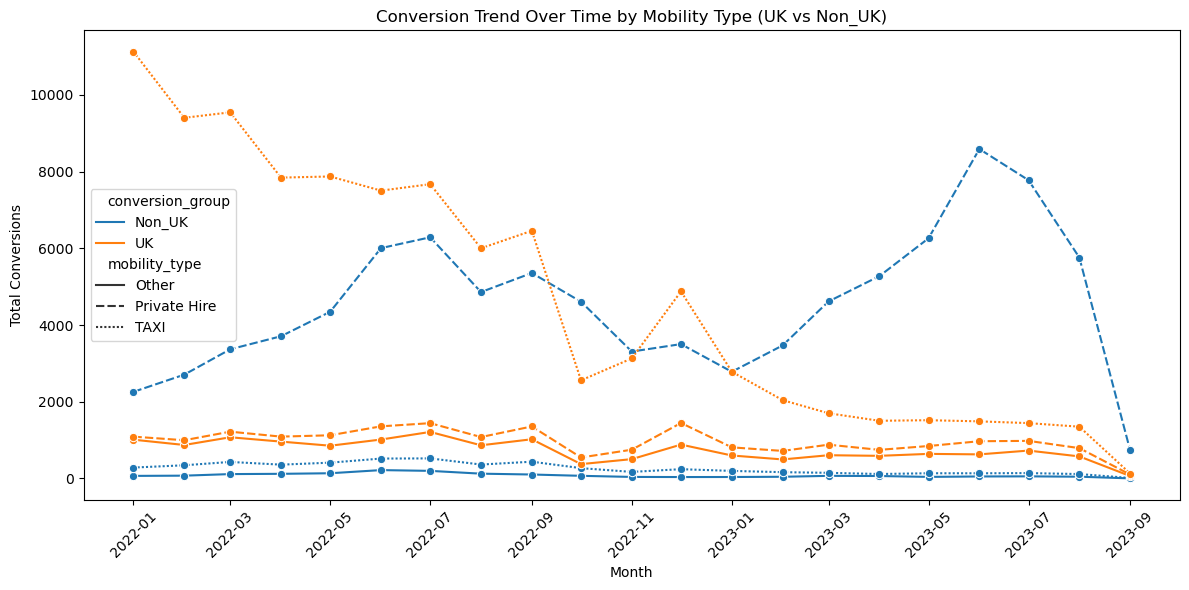

In [39]:
uk_mobility_time_grouped = uk_data.groupby(['month', 'conversion_group', 'mobility_type'])['Conversions'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Conversions', hue='conversion_group', style='mobility_type', data=uk_mobility_time_grouped, marker="o")
plt.title('Conversion Trend Over Time by Mobility Type (UK vs Non_UK)')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


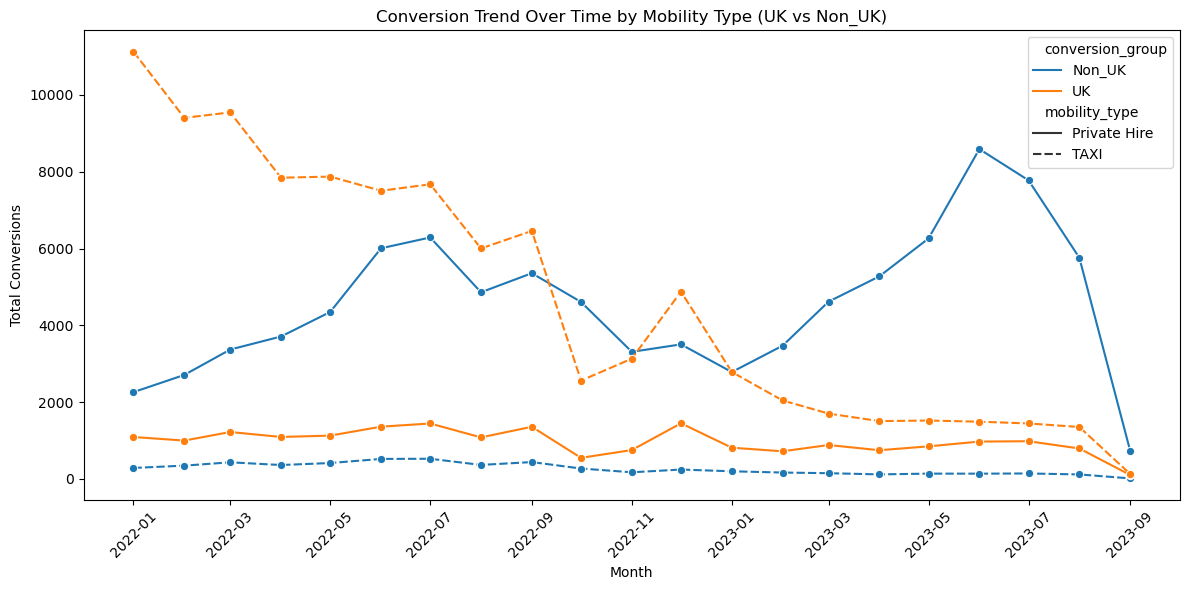

In [40]:
uk_mobility_time_filtered = uk_mobility_time_grouped[uk_mobility_time_grouped['mobility_type'] != 'Other']

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Conversions', hue='conversion_group', style='mobility_type', data=uk_mobility_time_filtered, marker="o")
plt.title('Conversion Trend Over Time by Mobility Type (UK vs Non_UK)')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\3029958040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')


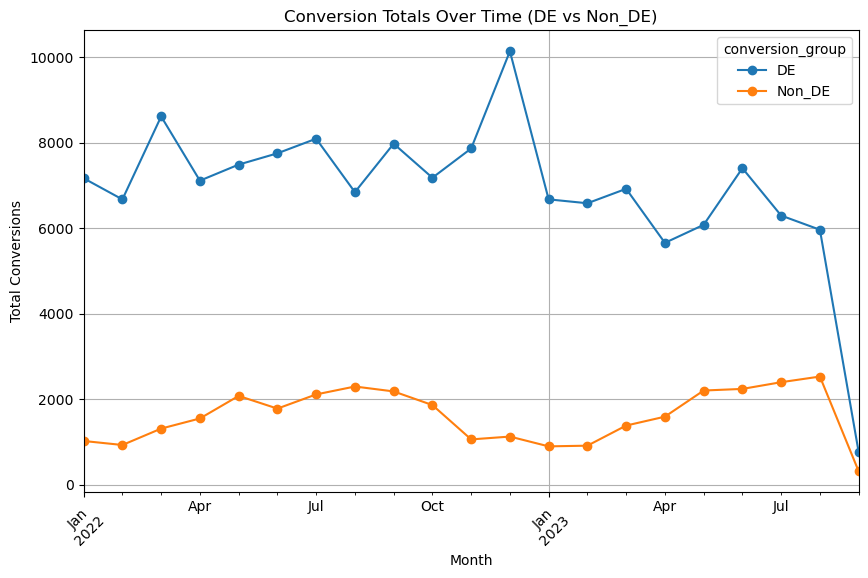

In [41]:

df = data_df
df_de = df[df['asset_country'] == 'DE']

df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

conversion_totals = df_de.groupby(['month', 'conversion_group'])['Conversions'].sum().unstack()

conversion_totals.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Conversion Totals Over Time (DE vs Non_DE)')
plt.ylabel('Total Conversions')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\213438272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')


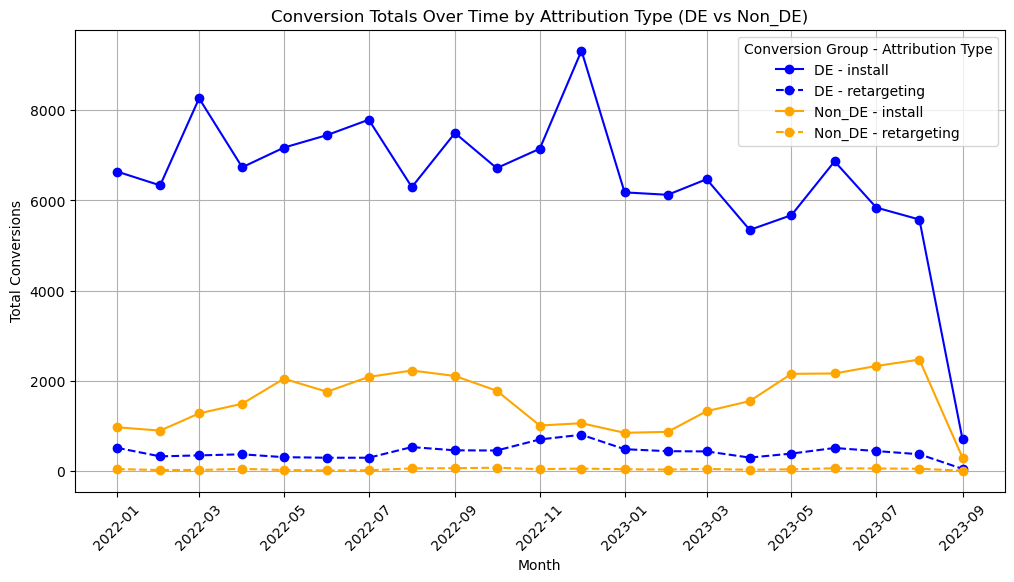

In [48]:
line_styles = {
    ('DE', 'install'): ('-', 'blue'),          
    ('DE', 'retargeting'): ('--', 'blue'),    
    ('Non_DE', 'install'): ('-', 'orange'), 
    ('Non_DE', 'retargeting'): ('--', 'orange') 
}

df_de = df[df['asset_country'] == 'DE']

df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

conversion_totals = df_de.groupby(['month', 'conversion_group', 'attribution_type'])['Conversions'].sum().unstack(['conversion_group', 'attribution_type'])

plt.figure(figsize=(12, 6))
for (conv_group, attr_type), style in line_styles.items():
    plt.plot(conversion_totals.index, 
             conversion_totals[(conv_group, attr_type)], 
             linestyle=style[0], color=style[1], 
             marker='o', label=f'{conv_group} - {attr_type}')

plt.title('Conversion Totals Over Time by Attribution Type (DE vs Non_DE)')
plt.ylabel('Total Conversions')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Conversion Group - Attribution Type')
plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\706344738.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')


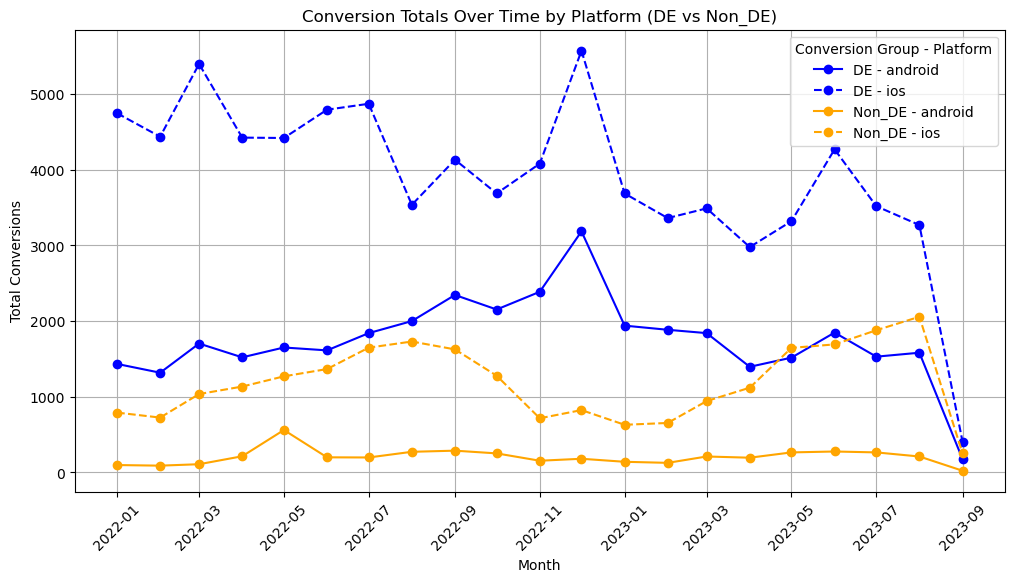

In [46]:

df_de = df[df['asset_country'] == 'DE']

df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

conversion_totals = df_de.groupby(['month', 'conversion_group', 'platform'])['Conversions'].sum().unstack(['conversion_group', 'platform'])

plt.figure(figsize=(12, 6))
for (conv_group, platform), style in line_styles.items():
    plt.plot(conversion_totals.index, 
             conversion_totals[(conv_group, platform)], 
             linestyle=style[0], color=style[1], 
             marker='o', label=f'{conv_group} - {platform}')

plt.title('Conversion Totals Over Time by Platform (DE vs Non_DE)')
plt.ylabel('Total Conversions')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Conversion Group - Platform')
plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\594697386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')


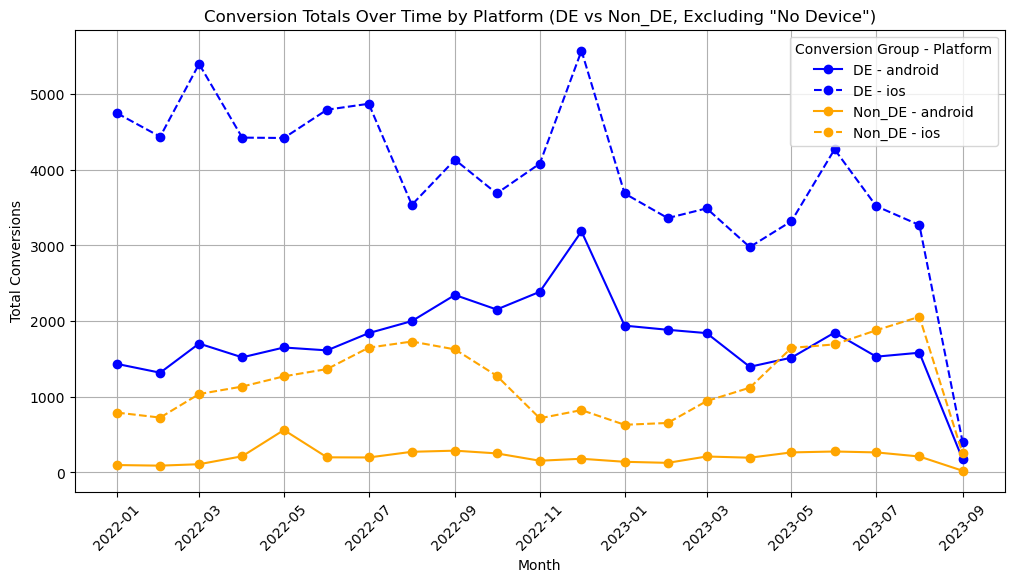

In [47]:

line_styles = {
    ('DE', 'android'): ('-', 'blue'),          
    ('DE', 'ios'): ('--', 'blue'),             
    ('Non_DE', 'android'): ('-', 'orange'), 
    ('Non_DE', 'ios'): ('--', 'orange')        
}

df_de = df[(df['asset_country'] == 'DE') & (df['platform'] != 'No Device')]

df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

conversion_totals = df_de.groupby(['month', 'conversion_group', 'platform'])['Conversions'].sum().unstack(['conversion_group', 'platform'])

plt.figure(figsize=(12, 6))
for (conv_group, platform), style in line_styles.items():
    plt.plot(conversion_totals.index, 
             conversion_totals[(conv_group, platform)], 
             linestyle=style[0], color=style[1], 
             marker='o', label=f'{conv_group} - {platform}')

plt.title('Conversion Totals Over Time by Platform (DE vs Non_DE, Excluding "No Device")')
plt.ylabel('Total Conversions')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Conversion Group - Platform')
plt.show()
 

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\1713321409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_contex

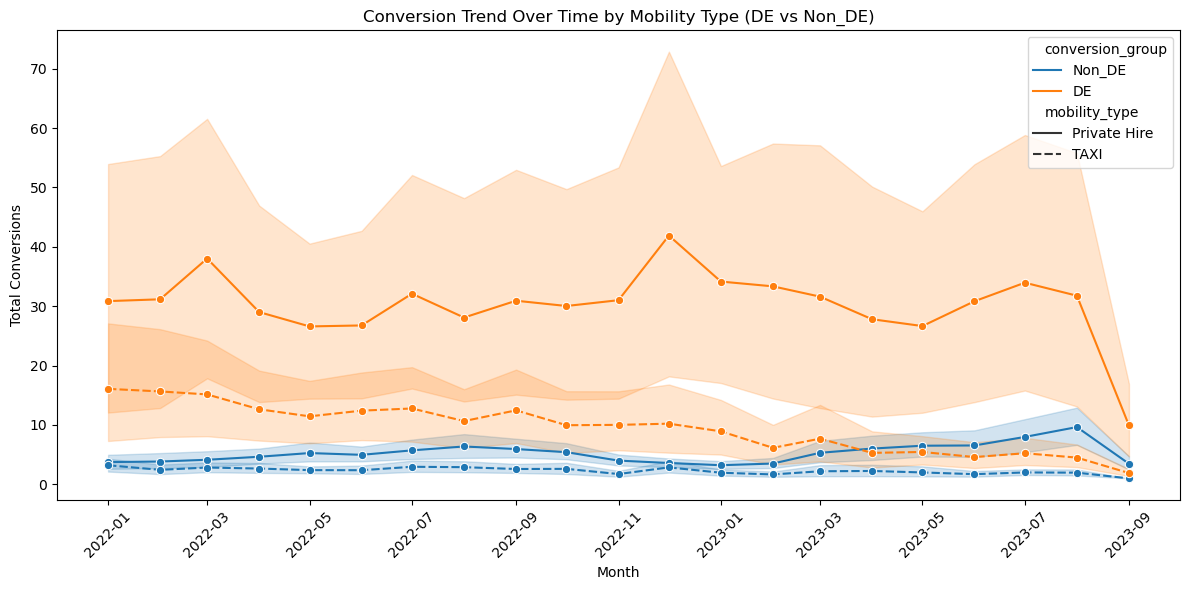

In [50]:
 

df_de = df[df['asset_country'] == 'DE']

df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

de_mobility_time_filtered = df_de[df_de['mobility_type'] != 'Other']

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Conversions', hue='conversion_group', style='mobility_type', data=de_mobility_time_filtered, marker="o")
plt.title('Conversion Trend Over Time by Mobility Type (DE vs Non_DE)')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\1774321204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emin.sen\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_contex

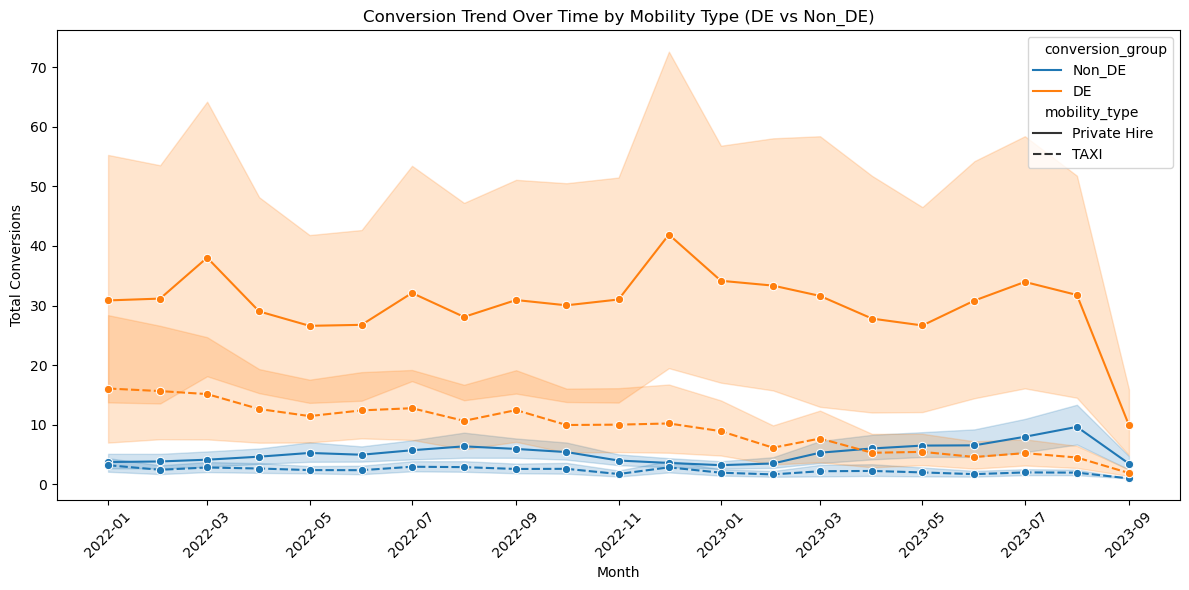

In [51]:
df_de = df[df['asset_country'] == 'DE']

df_de['conversion_group'] = df_de['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

de_mobility_time_filtered = df_de[df_de['mobility_type'] != 'Other']

plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Conversions', hue='conversion_group', style='mobility_type', data=de_mobility_time_filtered, marker="o", linestyle='-')
plt.title('Conversion Trend Over Time by Mobility Type (DE vs Non_DE)')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\4123323806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conversion_country_category'] = filtered_df['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')


<Figure size 1200x600 with 0 Axes>

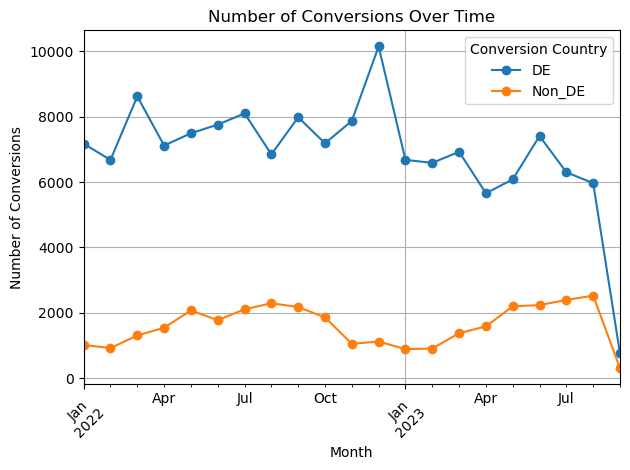

In [52]:
filtered_df = df[df['asset_country'] == 'DE']

filtered_df['conversion_country_category'] = filtered_df['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

grouped_df = filtered_df.groupby(['month', 'conversion_country_category'])['Conversions'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
grouped_df.plot(kind='line', marker='o')
plt.title('Number of Conversions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Conversions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Conversion Country')
plt.tight_layout()

plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\4080913191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conversion_country_category'] = filtered_df['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')


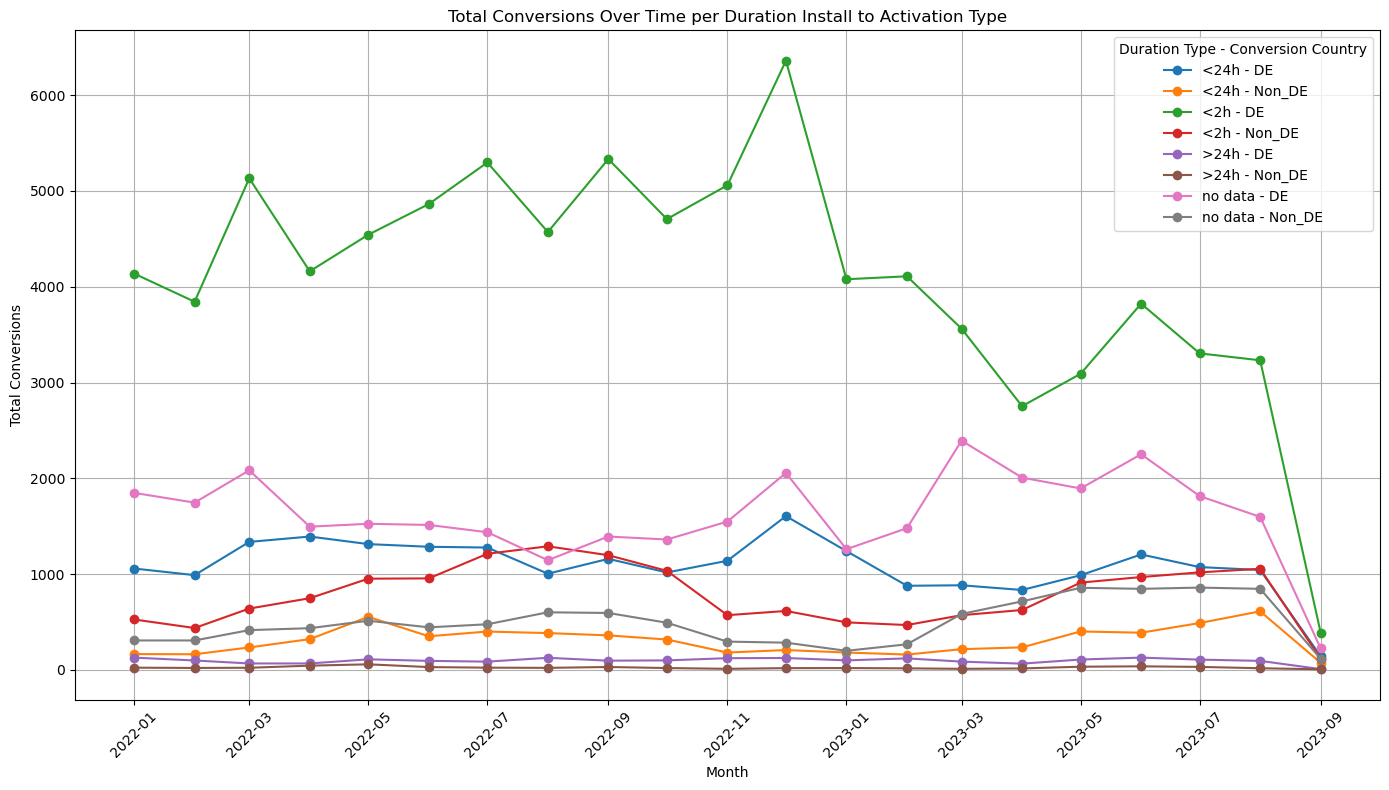

In [53]:
filtered_df['conversion_country_category'] = filtered_df['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

grouped_df = filtered_df.groupby(['month', 'duration_install_to_activation', 'conversion_country_category'])['Conversions'].sum().unstack(['duration_install_to_activation', 'conversion_country_category']).fillna(0)

plt.figure(figsize=(14, 8))
for duration in grouped_df.columns.levels[0]:
    for category in grouped_df.columns.levels[1]:
        plt.plot(grouped_df.index, grouped_df[duration][category], marker='o', label=f'{duration} - {category}')

plt.title('Total Conversions Over Time per Duration Install to Activation Type')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Duration Type - Conversion Country')
plt.tight_layout()

plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\3600682322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conversion_country_category'] = filtered_df['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')


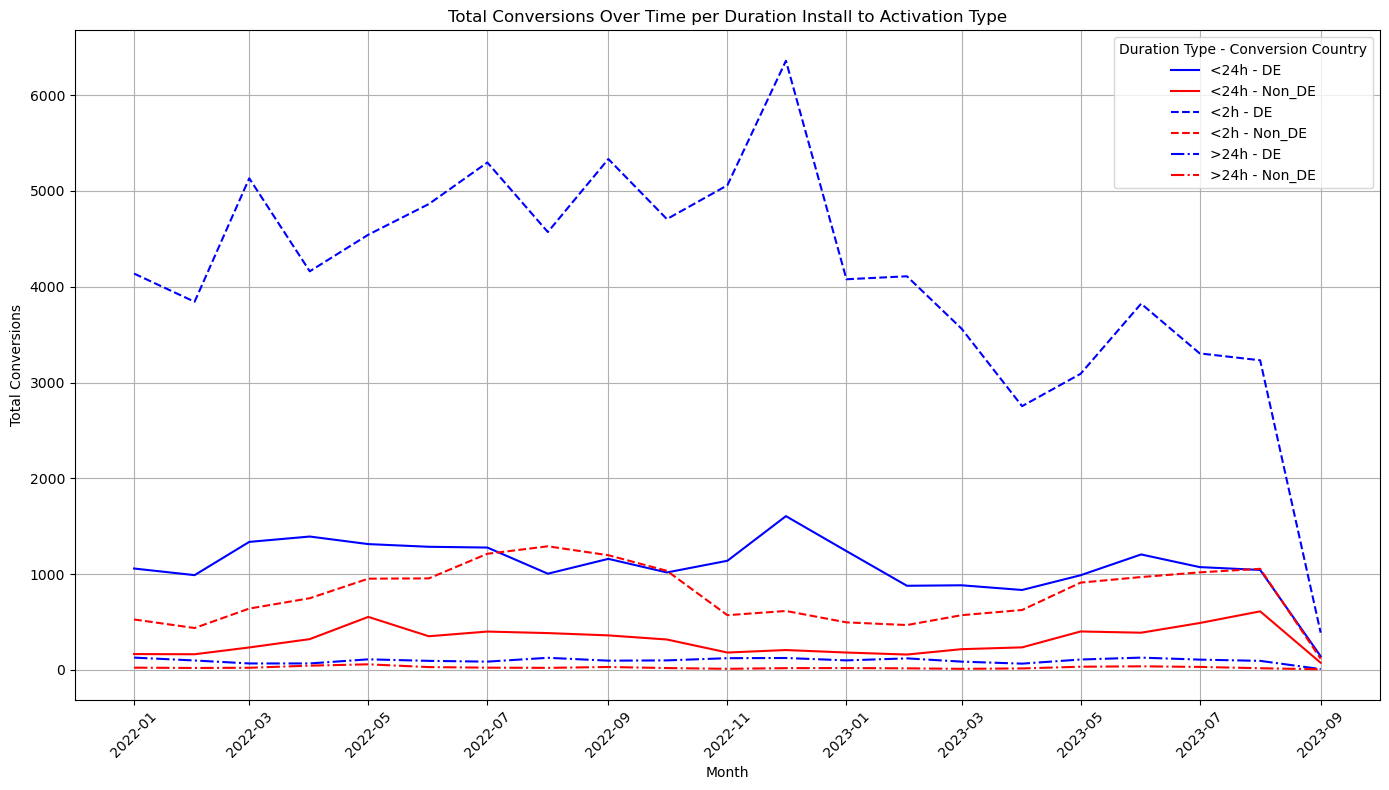

In [54]:
filtered_df = df[(df['asset_country'] == 'DE') & (df['duration_install_to_activation'] != 'no data')]

filtered_df['conversion_country_category'] = filtered_df['conversion_country'].apply(lambda x: 'DE' if x == 'DE' else 'Non_DE')

grouped_df = filtered_df.groupby(['month', 'duration_install_to_activation', 'conversion_country_category'])['Conversions'].sum().unstack(['duration_install_to_activation', 'conversion_country_category']).fillna(0)

styles = {
    'DE': ['-', '--', '-.', ':'],
    'Non_DE': ['-', '--', '-.', ':']
}

plt.figure(figsize=(14, 8))
for duration in grouped_df.columns.levels[0]:
    for category in grouped_df.columns.levels[1]:
        if category == 'DE':
            linestyle = styles['DE'].pop(0)  # Use and remove the first style for DE
            plt.plot(grouped_df.index, grouped_df[duration][category], linestyle=linestyle, color='blue', label=f'{duration} - DE')
        else:
            linestyle = styles['Non_DE'].pop(0)  # Use and remove the first style for Non_DE
            plt.plot(grouped_df.index, grouped_df[duration][category], linestyle=linestyle, color='red', label=f'{duration} - Non_DE')

plt.title('Total Conversions Over Time per Duration Install to Activation Type')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Duration Type - Conversion Country')
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\emin.sen\AppData\Local\Temp\ipykernel_20656\4215130498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['conversion_country_category'] = filtered_df['conversion_country'].apply(lambda x: 'UK' if x == 'UK' else 'non_UK')


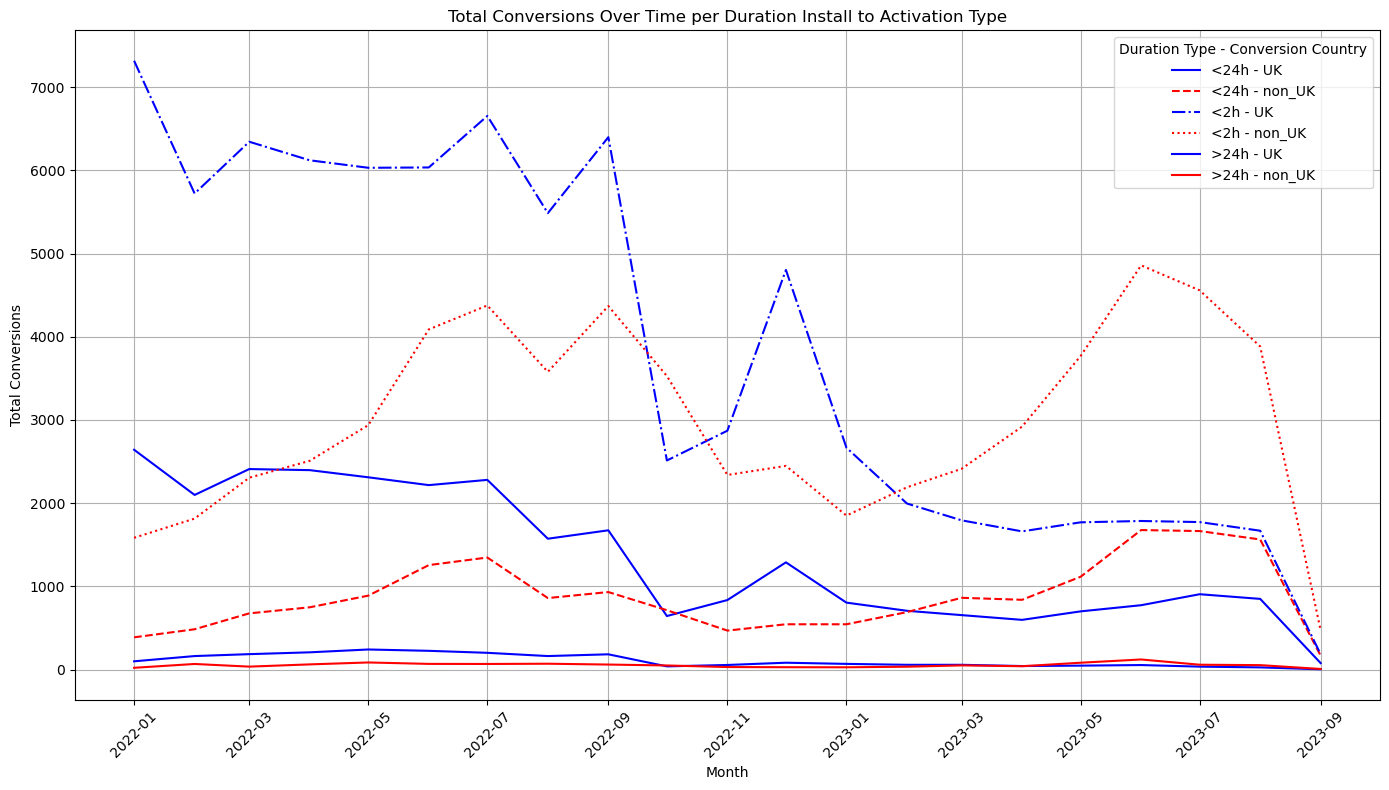

In [56]:
filtered_df = df[(df['asset_country'] == 'UK') & (df['duration_install_to_activation'] != 'no data')]

filtered_df['conversion_country_category'] = filtered_df['conversion_country'].apply(lambda x: 'UK' if x == 'UK' else 'non_UK')

grouped_df = filtered_df.groupby(['month', 'duration_install_to_activation', 'conversion_country_category'])['Conversions'].sum().unstack(['duration_install_to_activation', 'conversion_country_category']).fillna(0)

colors = {
    'UK': 'blue',
    'non_UK': 'red'
}
styles = ['-', '--', '-.', ':']

plt.figure(figsize=(14, 8))
for duration in grouped_df.columns.levels[0]:
    for category in grouped_df.columns.levels[1]:
        linestyle = styles.pop(0) if styles else '-'  # Rotate through styles
        plt.plot(grouped_df.index, grouped_df[duration][category], linestyle=linestyle, color=colors[category], label=f'{duration} - {category}')

plt.title('Total Conversions Over Time per Duration Install to Activation Type')
plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Duration Type - Conversion Country')
plt.tight_layout()

# Show the plot
plt.show()

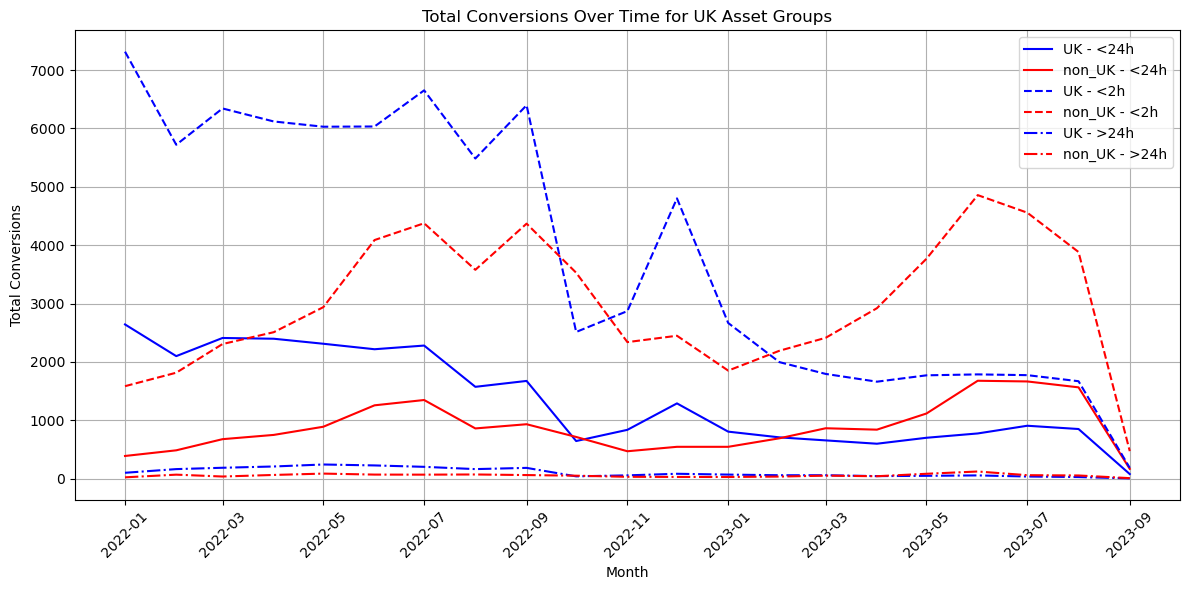

In [57]:
df_filtered['conversion_category'] = df_filtered['conversion_country'].apply(lambda x: 'UK' if x == 'UK' else 'non_UK')

df_aggregated = df_filtered.groupby(['month', 'conversion_category', 'duration_install_to_activation'])['Conversions'].sum().reset_index()

df_pivot = df_aggregated.pivot_table(index=['month', 'duration_install_to_activation'], columns='conversion_category', values='Conversions').reset_index()

line_styles = ['-', '--', '-.', ':']

plt.figure(figsize=(12, 6))

for i, duration in enumerate(df_pivot['duration_install_to_activation'].unique()):
    df_subset = df_pivot[df_pivot['duration_install_to_activation'] == duration]
    
    if 'UK' in df_subset.columns:
        plt.plot(df_subset['month'], df_subset['UK'], 
                 label=f'UK - {duration}', 
                 linestyle=line_styles[i % len(line_styles)], 
                 color='blue')
    
    if 'non_UK' in df_subset.columns:
        plt.plot(df_subset['month'], df_subset['non_UK'], 
                 label=f'non_UK - {duration}', 
                 linestyle=line_styles[i % len(line_styles)], 
                 color='red')

plt.xlabel('Month')
plt.ylabel('Total Conversions')
plt.title('Total Conversions Over Time for UK Asset Groups')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.show()